In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing all the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Reading the data

In [3]:
lead_df = pd.read_csv(r'C:\Users\dmis0\OneDrive\Documents\UpGrade\Clustering\Lead Scoring Assignment\Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# shape of the df
lead_df.shape


(9240, 37)

In [5]:
# Inspecting all the variables infomation at one place
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# inspecting all the numerical variables
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Inspecting and Cleaning the data

<AxesSubplot:>

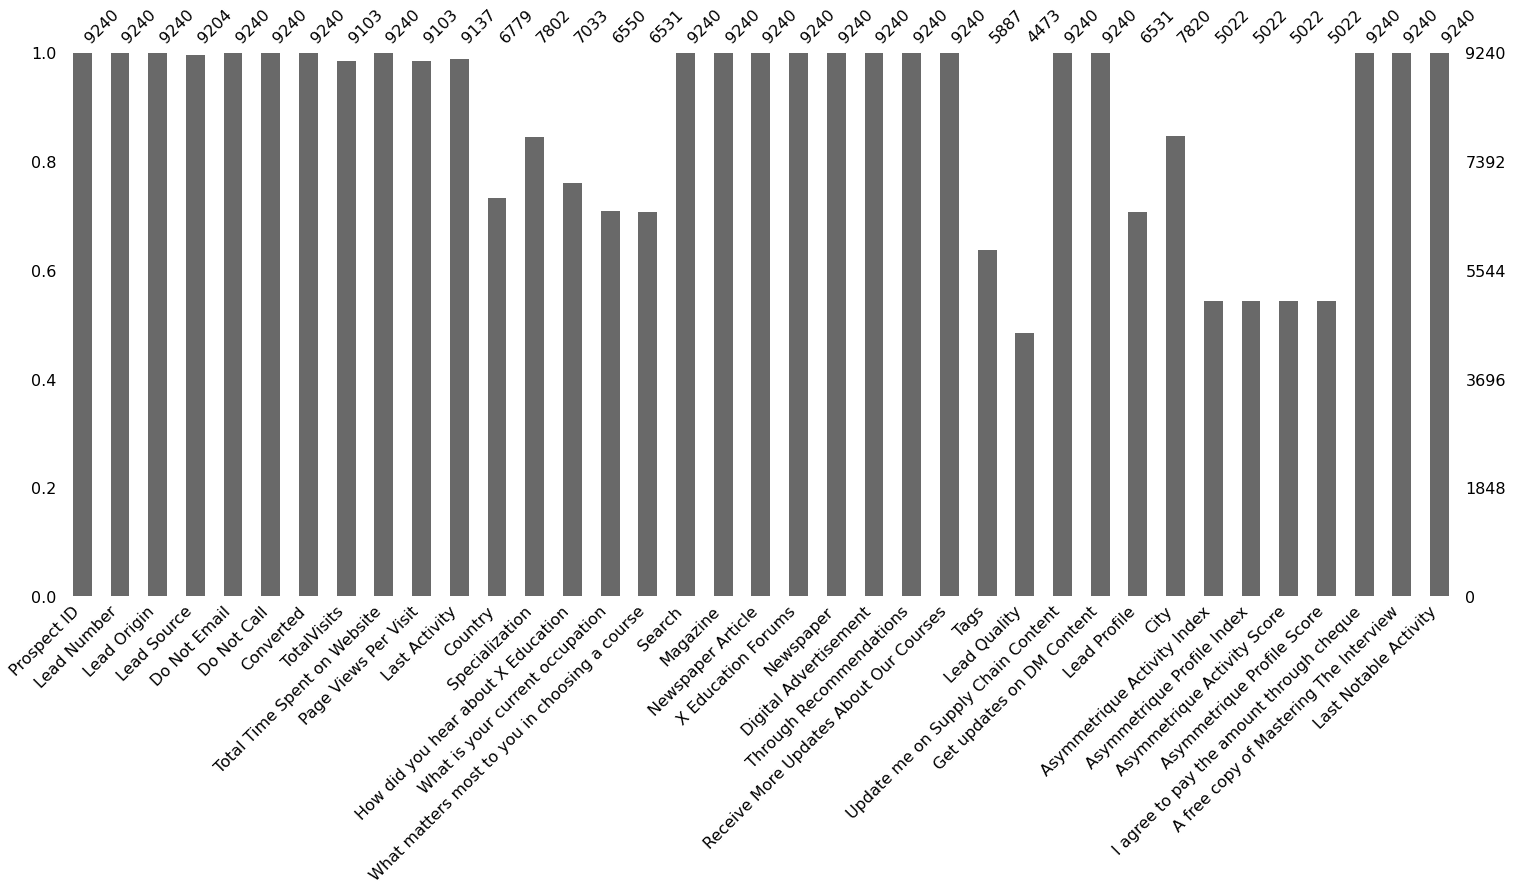

In [7]:
# missing values
msno.bar(lead_df)


In [8]:
# Using sweetviz to visualize the data before proceeding further
import sweetviz as sv
sweet_report = sv.analyze(lead_df)
sweet_report.show_html('Leads_report.html')



Report Leads_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


 By looking at all the above infomation we can see there are lot of columns with high number of null values present.

In [9]:
# since select means no option is selected, hence we will replace 'Select' with 'NaN'
lead_df = lead_df.replace('Select', np.nan)

In [10]:
# looking for variables with one unique entry since it won't affect our analysis
lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Droping unique valued columns which has only one unique value
lead_df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                       'Get updates on DM Content', 'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [12]:
lead_df.shape

(9240, 32)

In [13]:
# percentage missing values
round(100*(lead_df.isnull().sum())/len(lead_df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
# Dropping varibales with more than 30% missing values barring 'Specialization', since it might be usefull information
lead_df.drop(['How did you hear about X Education','Tags','Lead Quality',
                         'Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index',
                         'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1, inplace = True)


In [15]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [16]:
lead_df.shape

(9240, 23)

<AxesSubplot:>

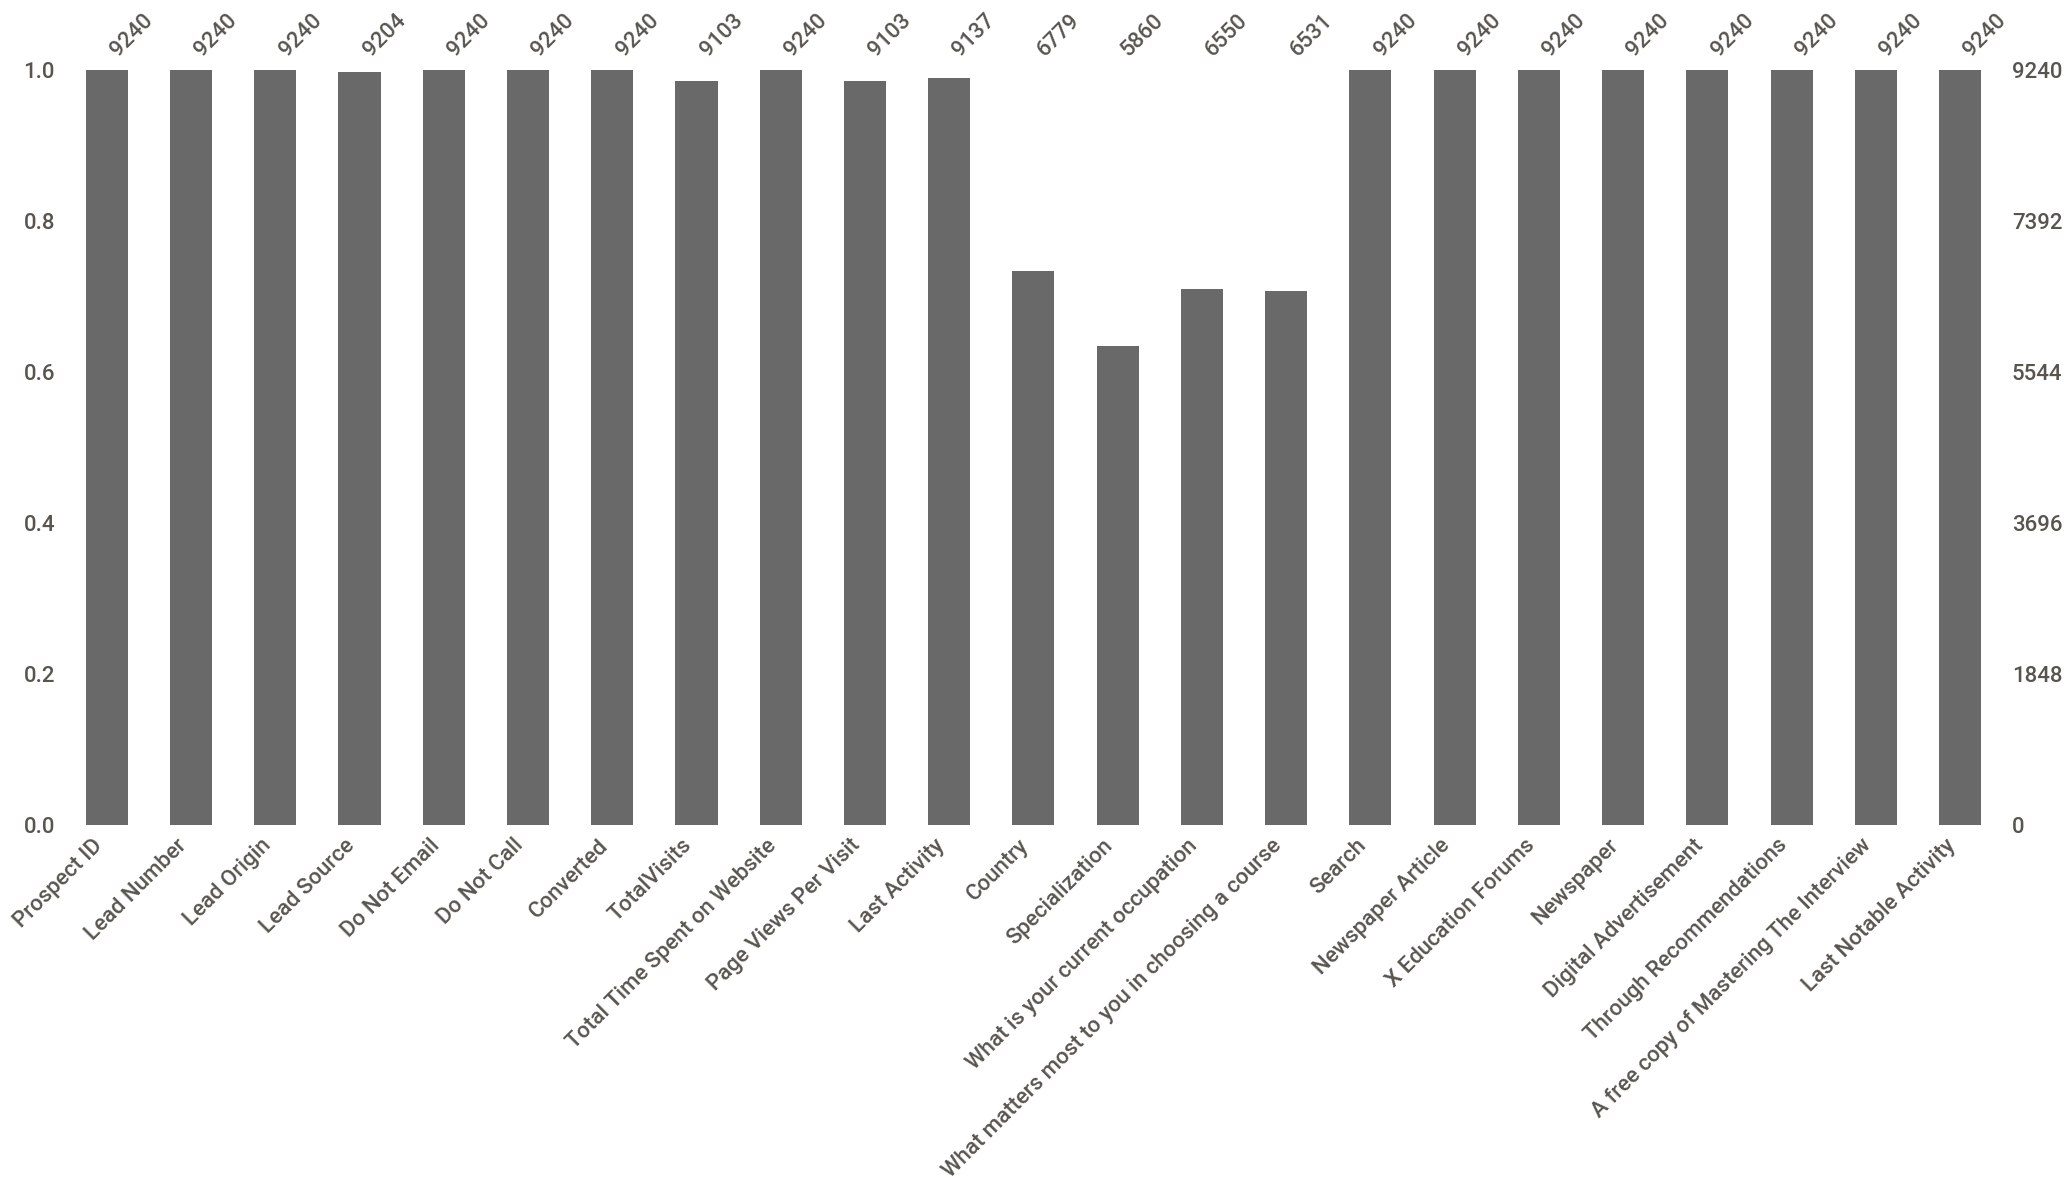

In [17]:
# missing values
msno.bar(lead_df)

In [18]:
# percentage missing values
round(100*(lead_df.isnull().sum())/len(lead_df),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [19]:
# get the counts of all the columns
for column in lead_df:
    print(lead_df[column].astype('category').value_counts())
    print('__________________________')
    

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
__________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
__________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________________
Google               2868
Direct Traffic 

In [20]:
lead_df['Country'] = lead_df['Country'].fillna('not provided')
lead_df['Specialization'] = lead_df['Specialization'].fillna('not provided')
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].fillna('not provided')
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna('not provided')

<AxesSubplot:>

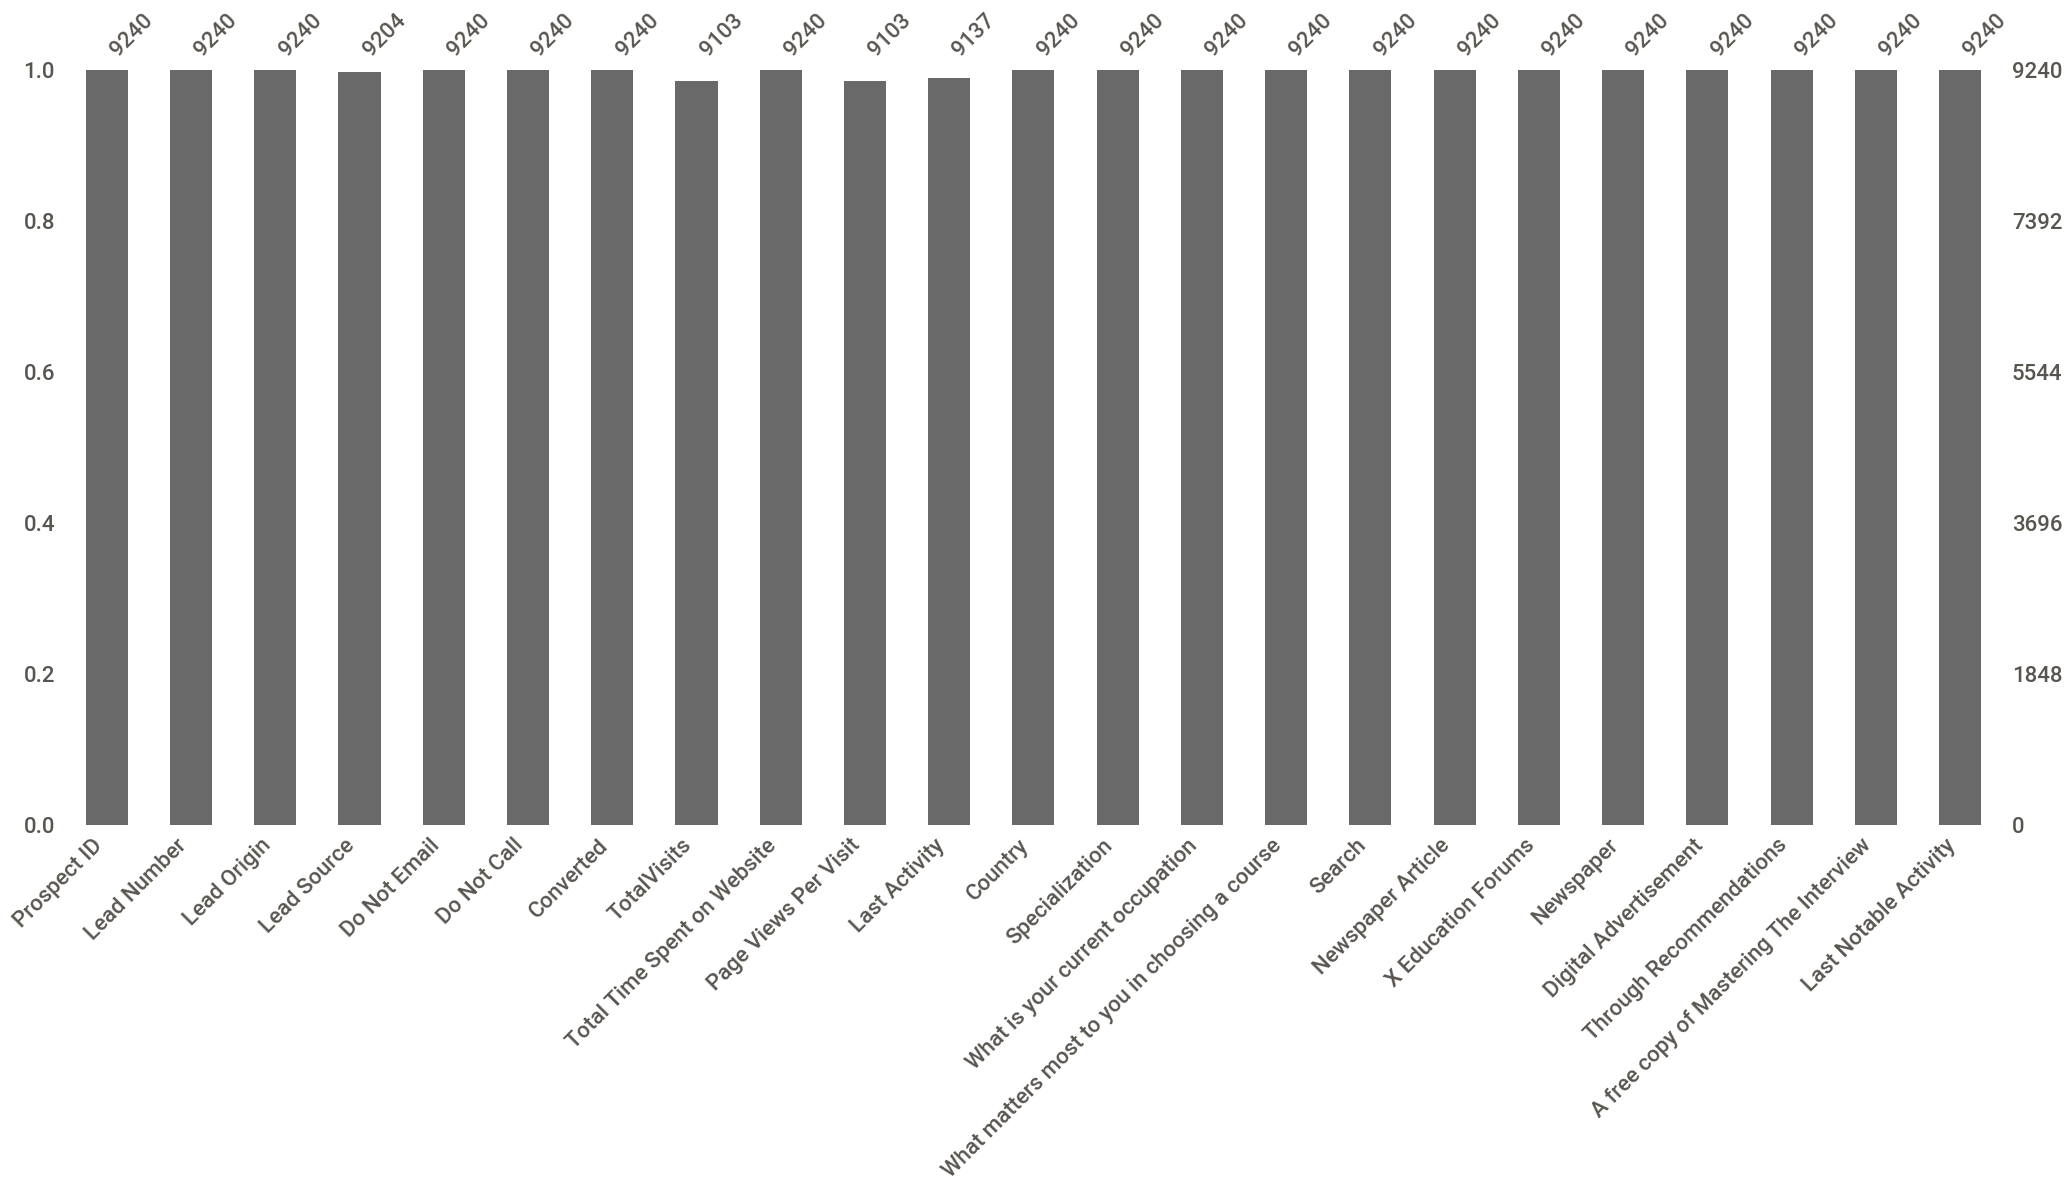

In [21]:
# missing values
msno.bar(lead_df)

In [22]:
# percentage missing values
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [23]:
# categorising 'Country'
def cat(x):
    category=''
    if x == 'India':
        category = 'India'
    elif x == 'not provided':
        category = 'not provided'
    else:
        category = 'outside India'
    return category

lead_df['Country'] = lead_df.apply(lambda x:cat(x['Country']), axis=1)
lead_df['Country'].value_counts()   
    

India            6492
not provided     2461
outside India     287
Name: Country, dtype: int64

In [24]:
# percentage missing values
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

Now since the number of null values present are really small hance we can drop these rows

In [25]:
# checking the percent of lose if the null values are removed
round(100*(sum(lead_df.isnull().sum(axis=1)>1)/lead_df.shape[0]),2)

1.48

In [26]:
# Drop the null value rows in column 'Lead Source'
lead_df = lead_df[~pd.isnull(lead_df['Lead Source'])]

In [27]:
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.41
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.41
Last Activity                                    1.10
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [28]:
# Drop the null value rows in column 'TotalVisits'
lead_df = lead_df[~pd.isnull(lead_df['TotalVisits'])]

In [29]:
round(100*(lead_df.isnull().sum()/len(lead_df)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [30]:
# checking percentage of rows we have retained
print(len(lead_df.index))
print(len(lead_df.index)/9240)

9074
0.982034632034632


We have manage to retained 98.2% data

In [31]:
# removing 'Prospect ID' and 'Lead Number' since they are same for everyone
lead_df.drop(['Prospect ID','Lead Number'],1,inplace=True)

In [32]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [33]:
lead_df.shape

(9074, 21)

<AxesSubplot:>

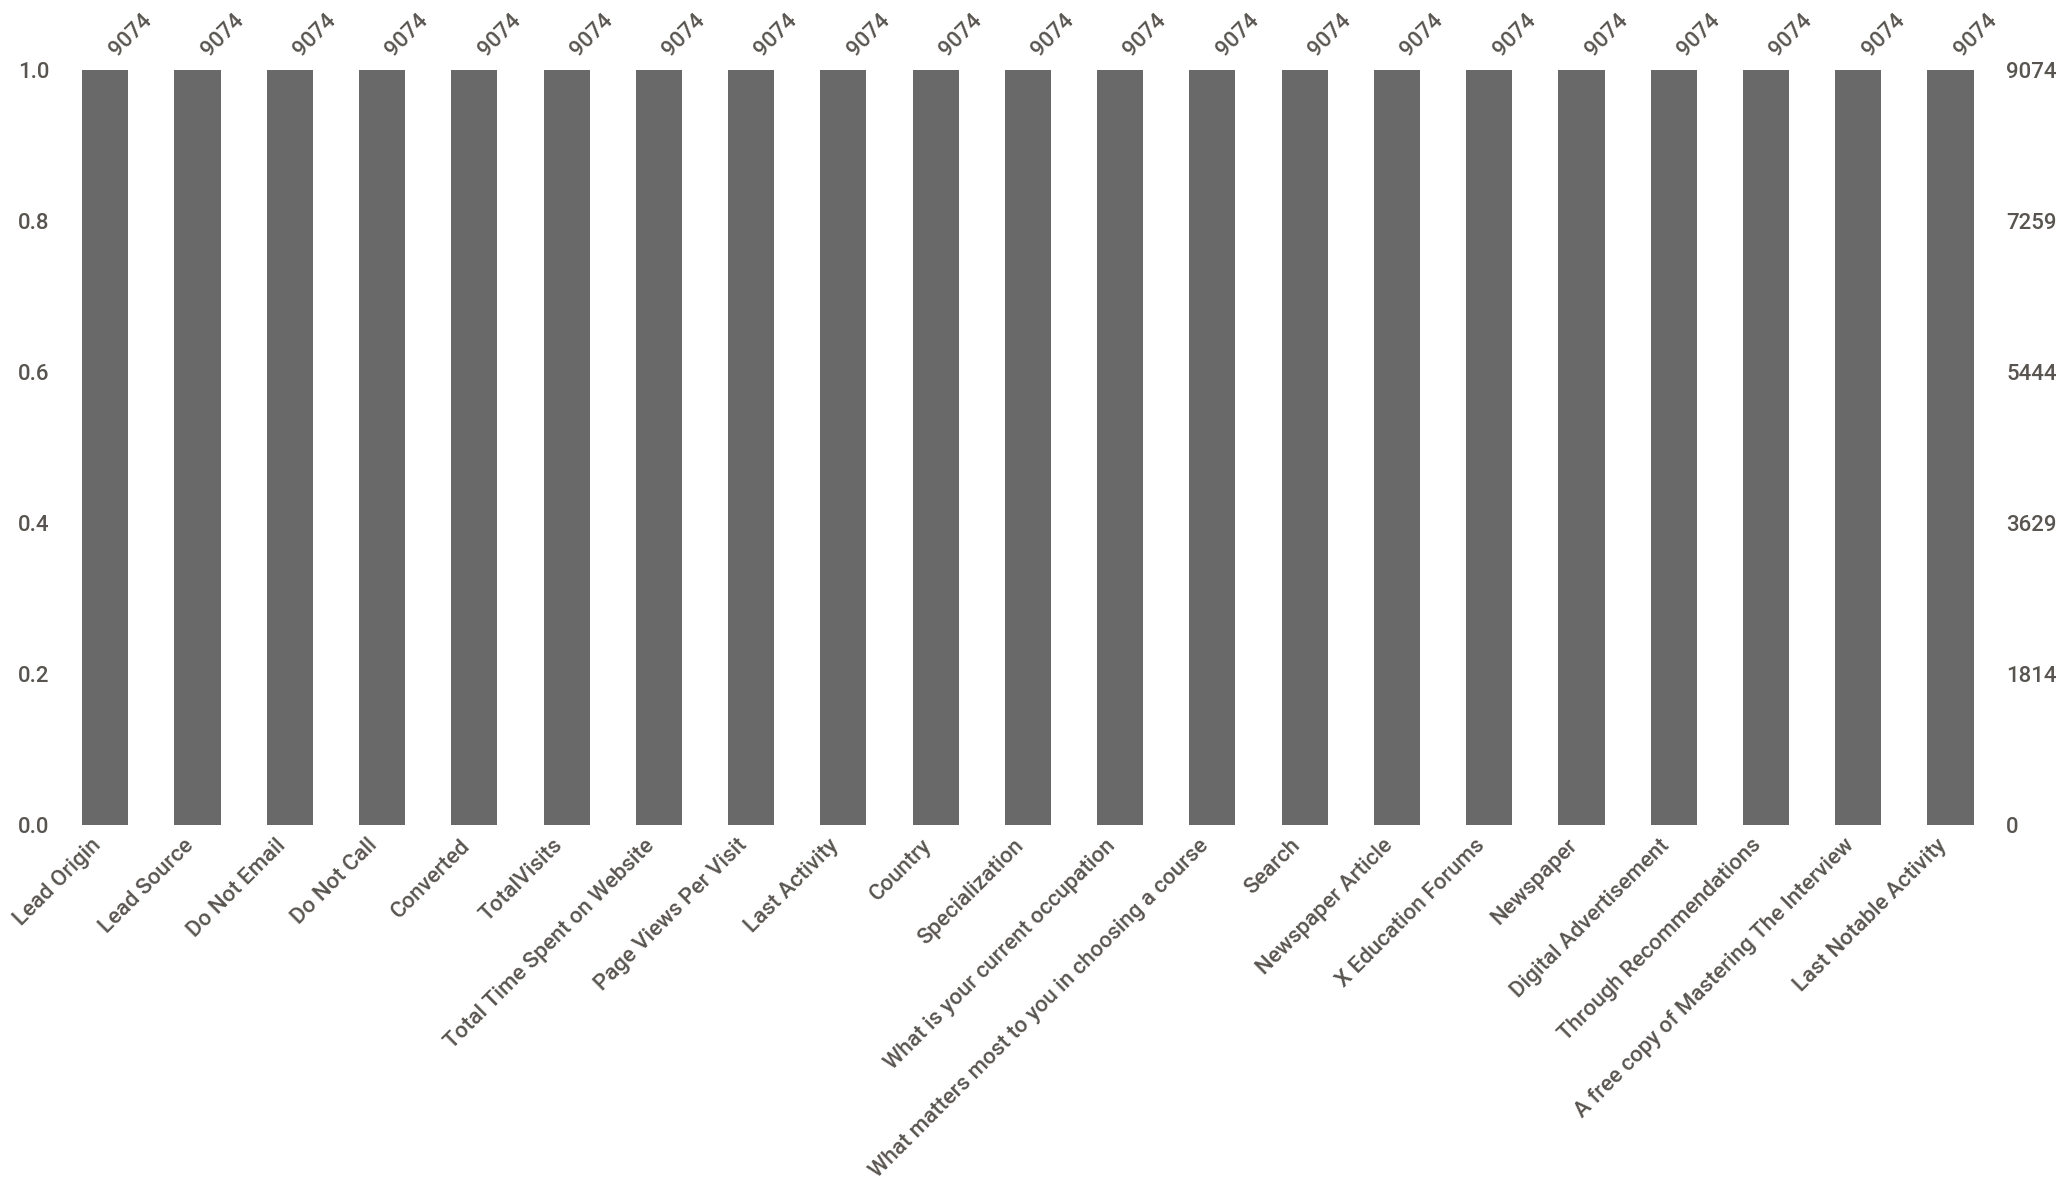

In [34]:
# missing values after doing all the manipulation
msno.bar(lead_df)

### EDA

In [35]:
# we can do this using sweetviz
import sweetviz as sv
sweet_report = sv.analyze(lead_df)
sweet_report.show_html('Leads_report.html')


Report Leads_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### We can also do this without using sweetviz

### Univariate Analysis

In [36]:
# categorical variables
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

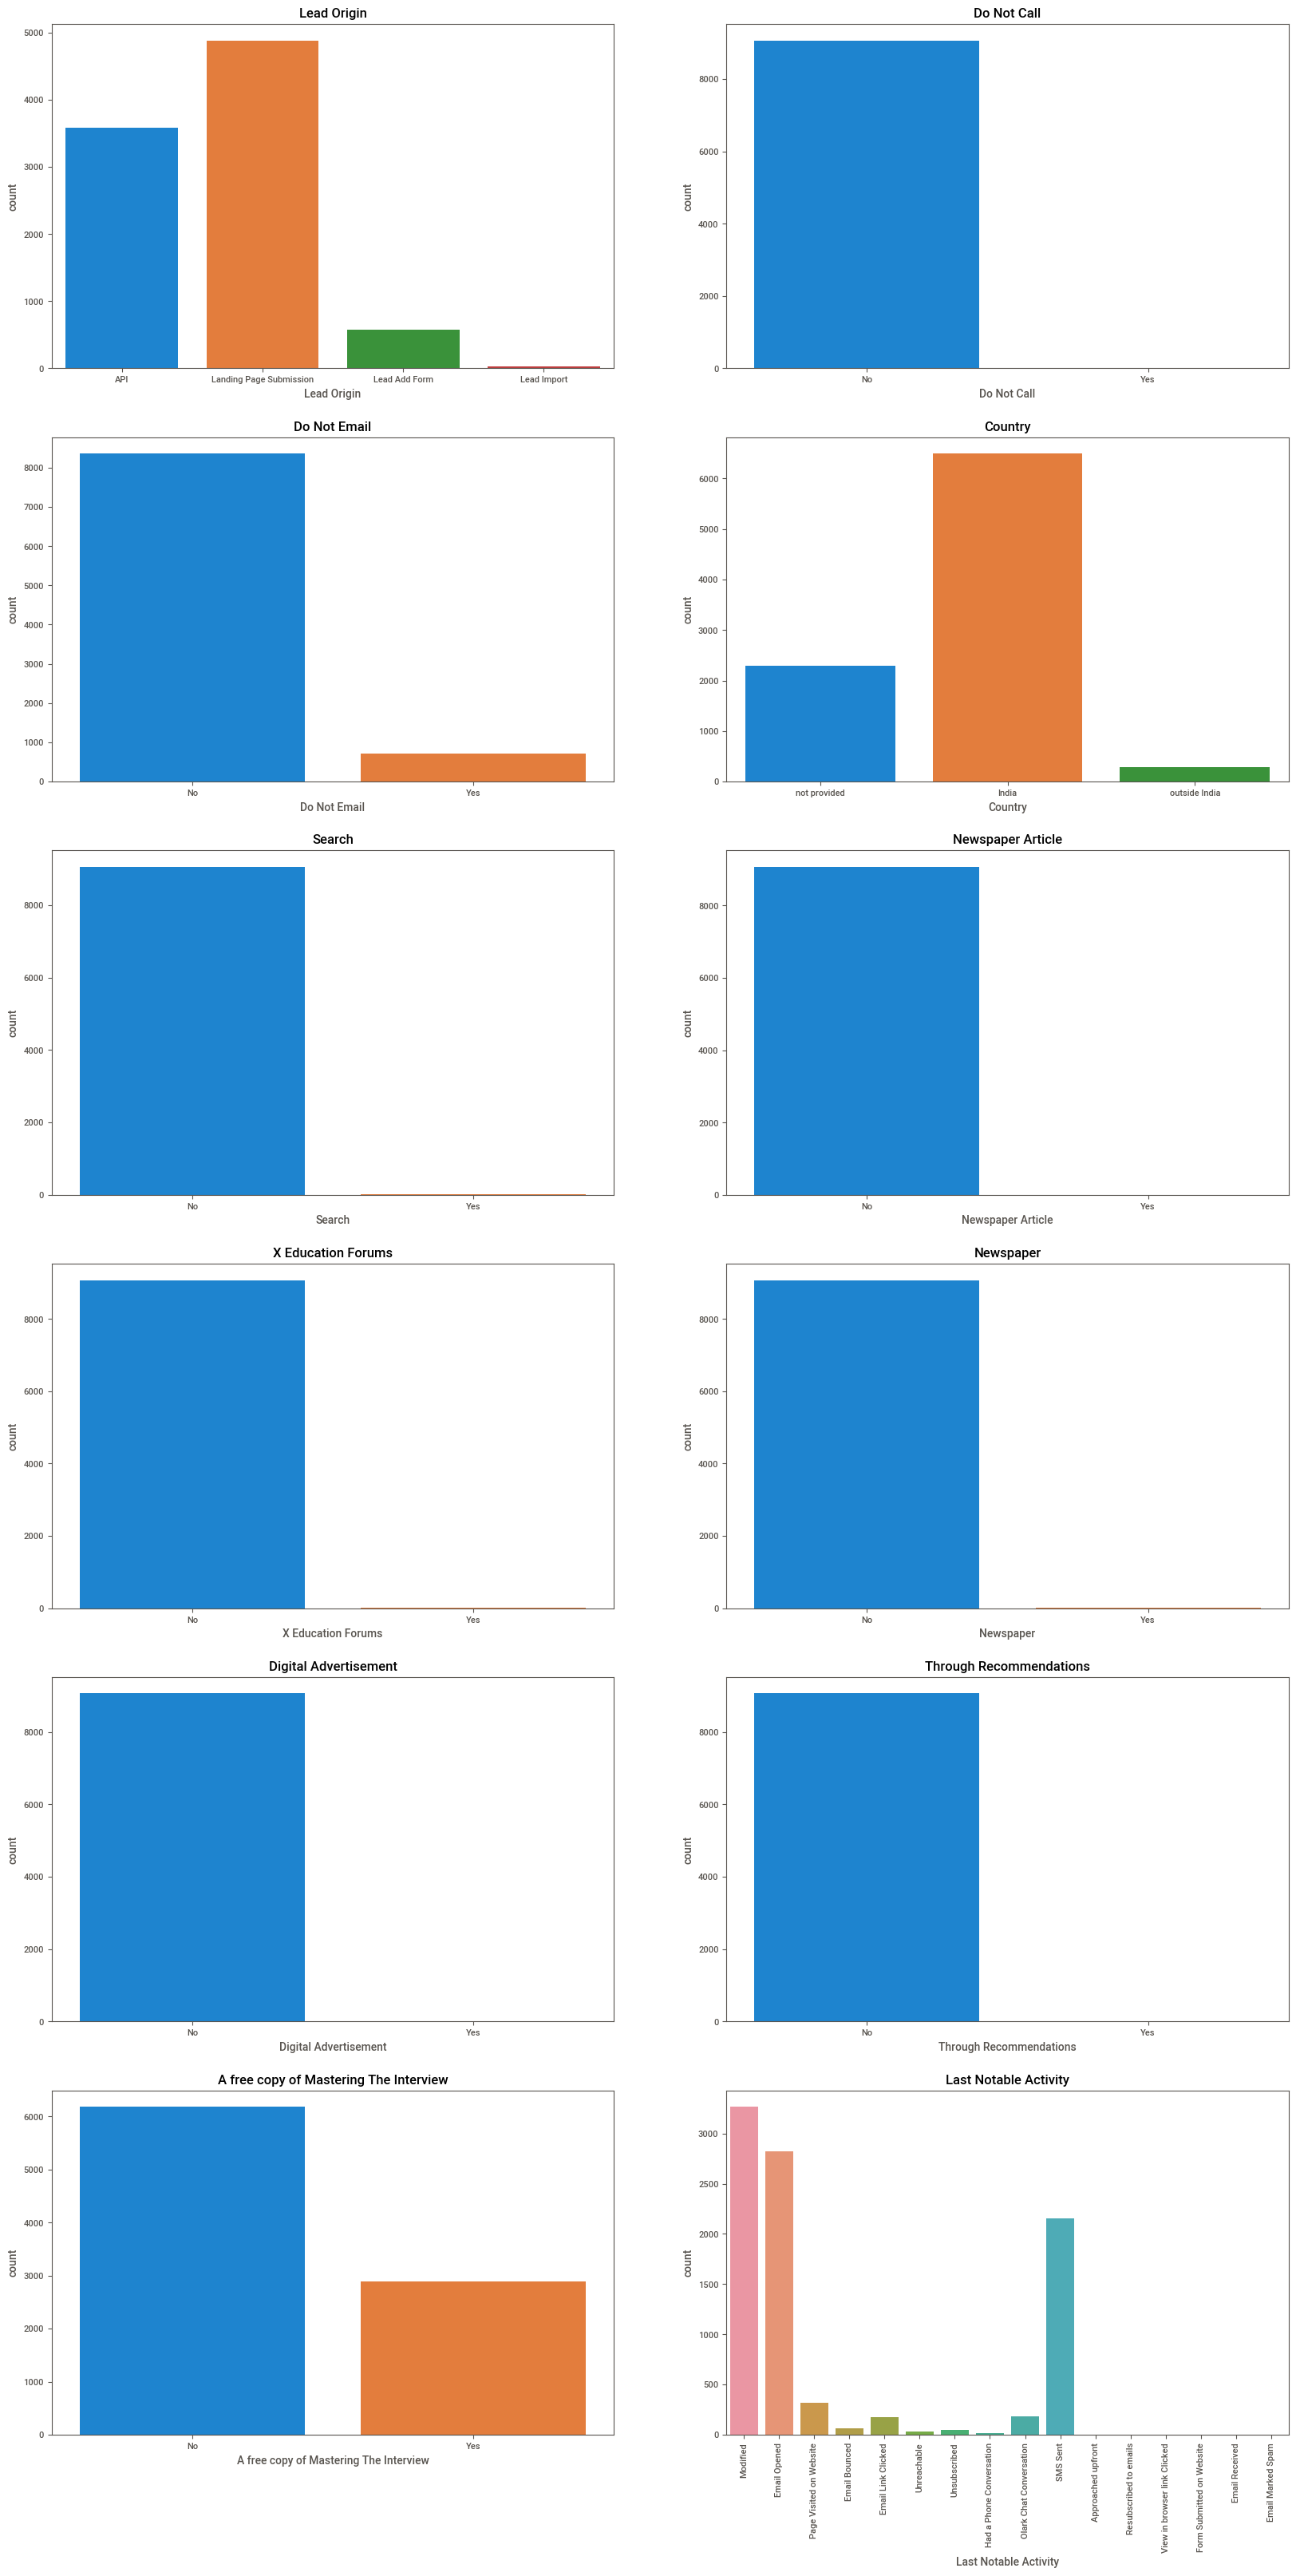

In [37]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,3)
sns.countplot(lead_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,4)
sns.countplot(lead_df['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(lead_df['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(lead_df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(lead_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(lead_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(lead_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(lead_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(lead_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

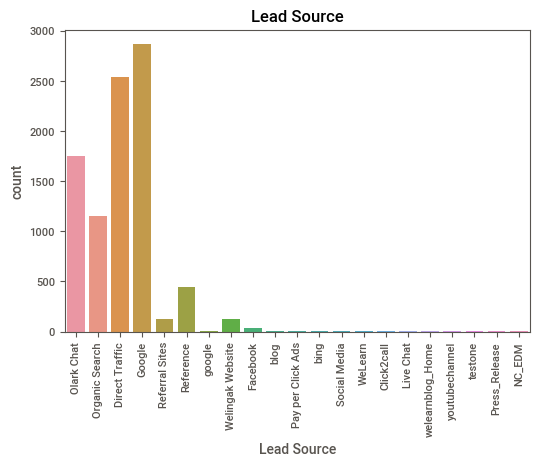

In [38]:
sns.countplot(lead_df['Lead Source']).tick_params(axis='x',rotation=90)
plt.title('Lead Source')
plt.show()

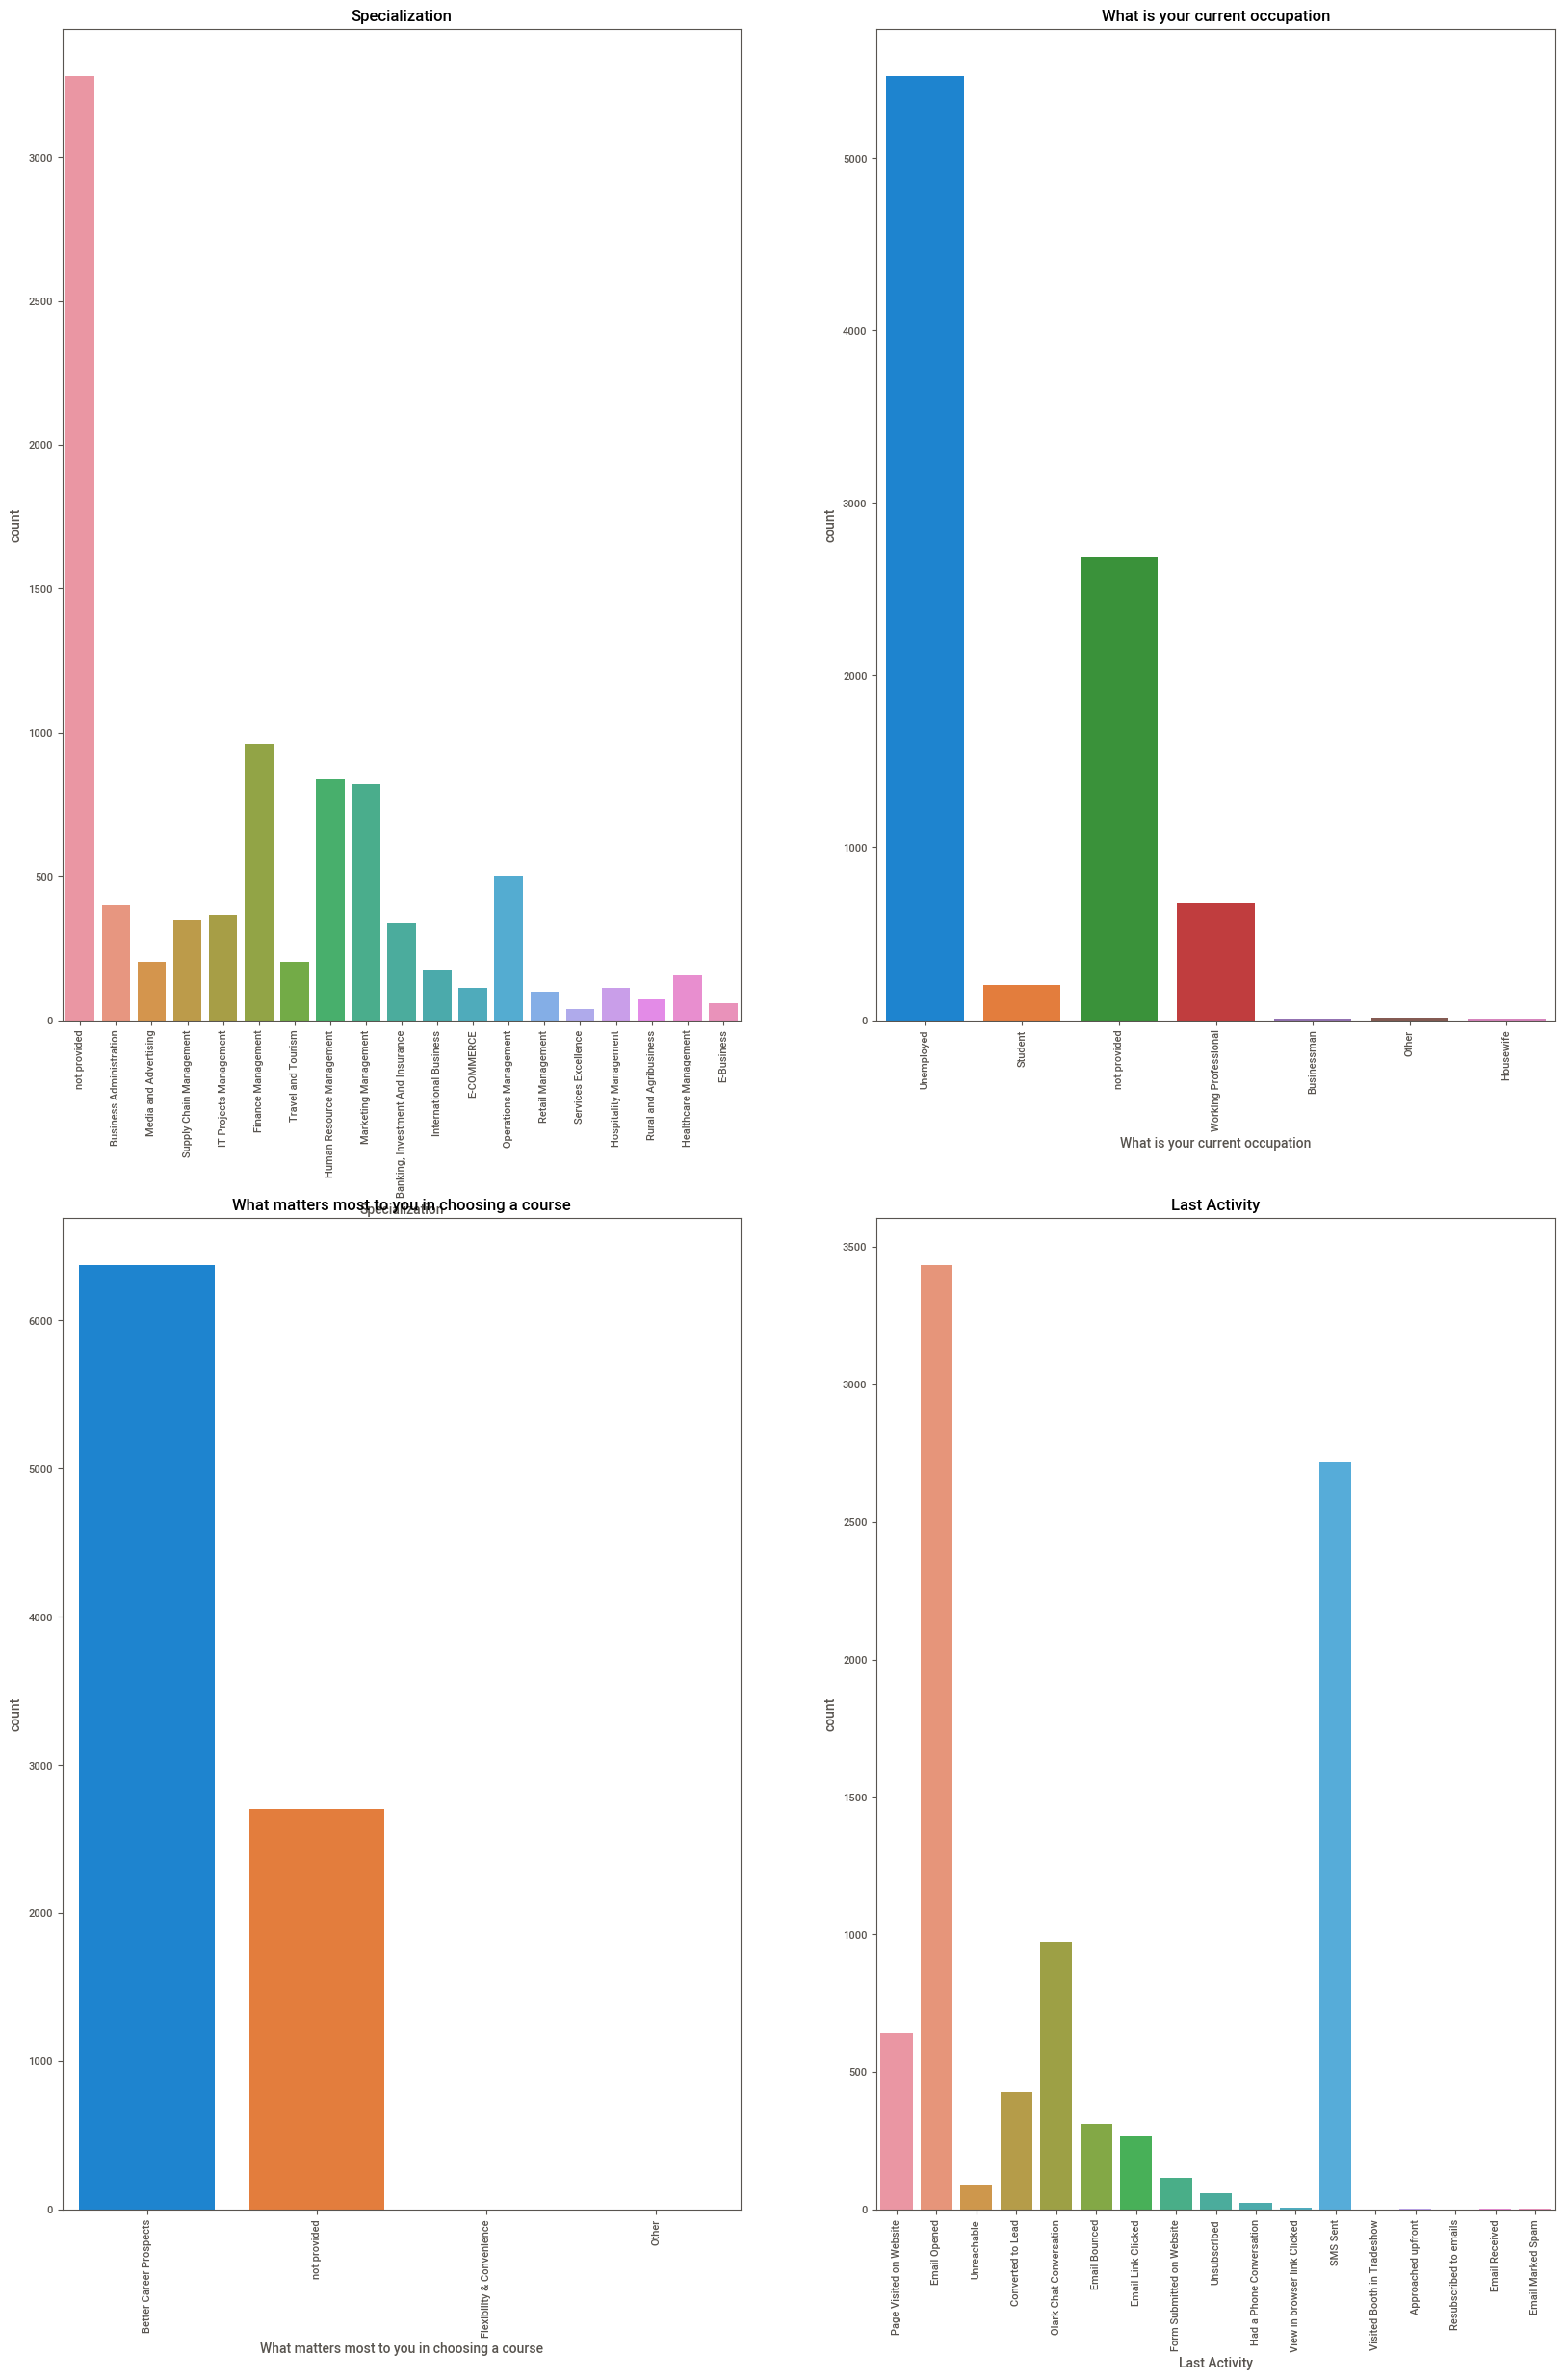

In [39]:
plt.figure(figsize=(20,30))

plt.subplot(2,2,1)
sns.countplot(lead_df['Specialization']).tick_params(axis='x',rotation=90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(lead_df['What is your current occupation']).tick_params(axis='x',rotation=90)
plt.title('What is your current occupation')
plt.subplot(2,2,3)
sns.countplot(lead_df['What matters most to you in choosing a course']).tick_params(axis='x',rotation=90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(lead_df['Last Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Activity')
plt.show()

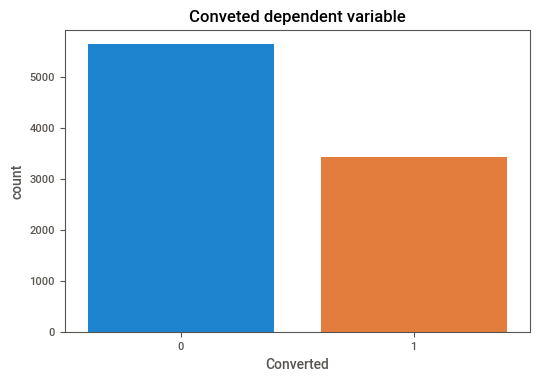

In [40]:
sns.countplot(lead_df['Converted'])
plt.title('Conveted dependent variable')
plt.show()

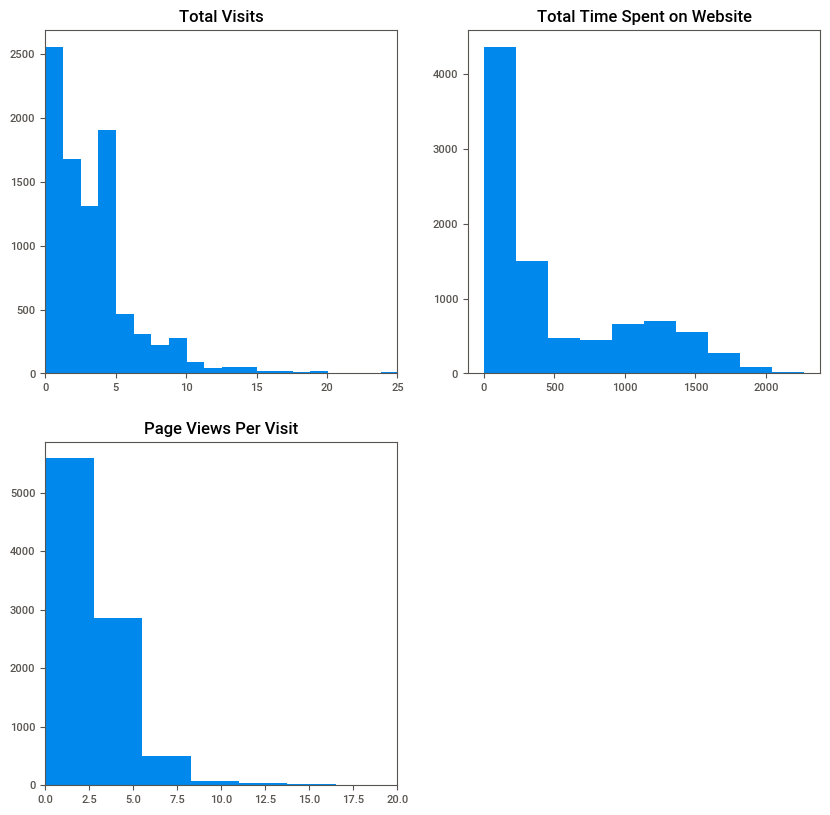

In [41]:
# Numerical Varialbes
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Relationship between categorical variables and converted

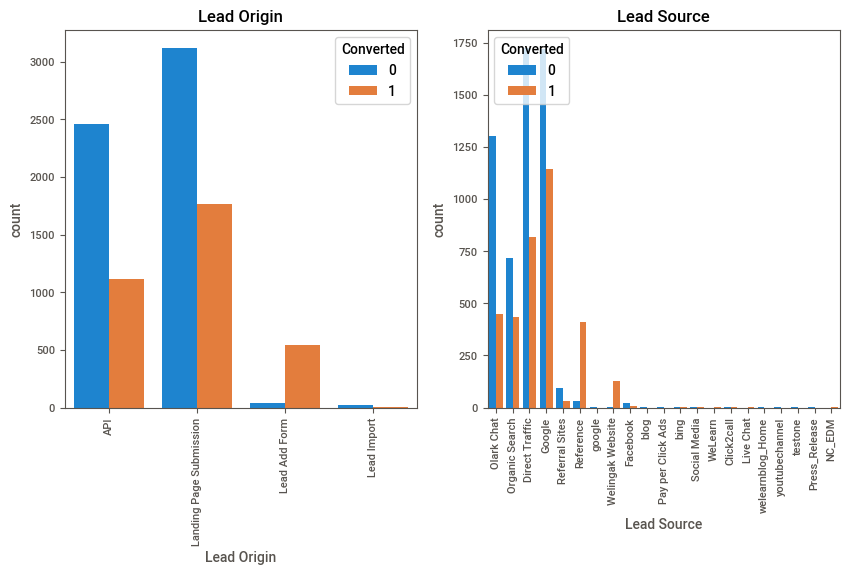

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

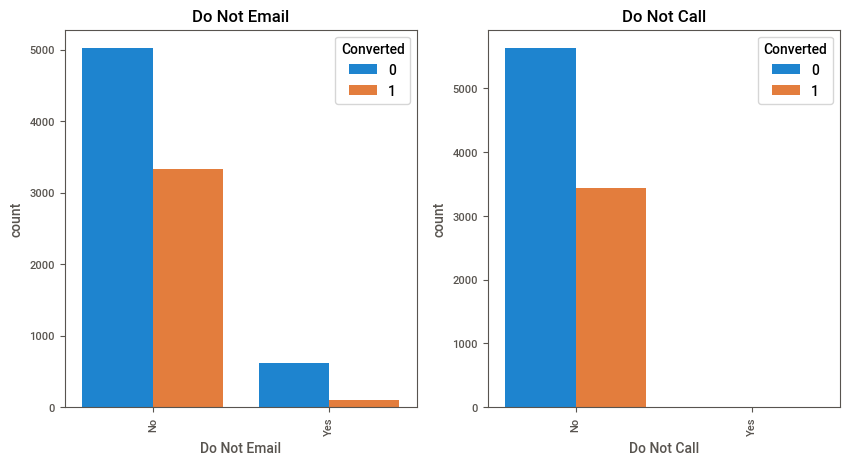

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

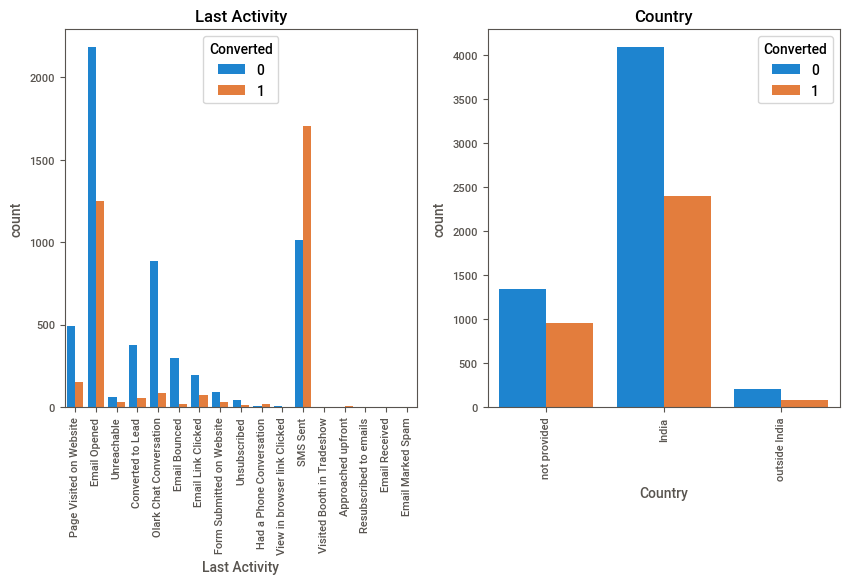

In [44]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity',hue='Converted',data=lead_df).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country',hue='Converted',data=lead_df).tick_params(axis='x',rotation=90)
plt.title('Country')

plt.show()

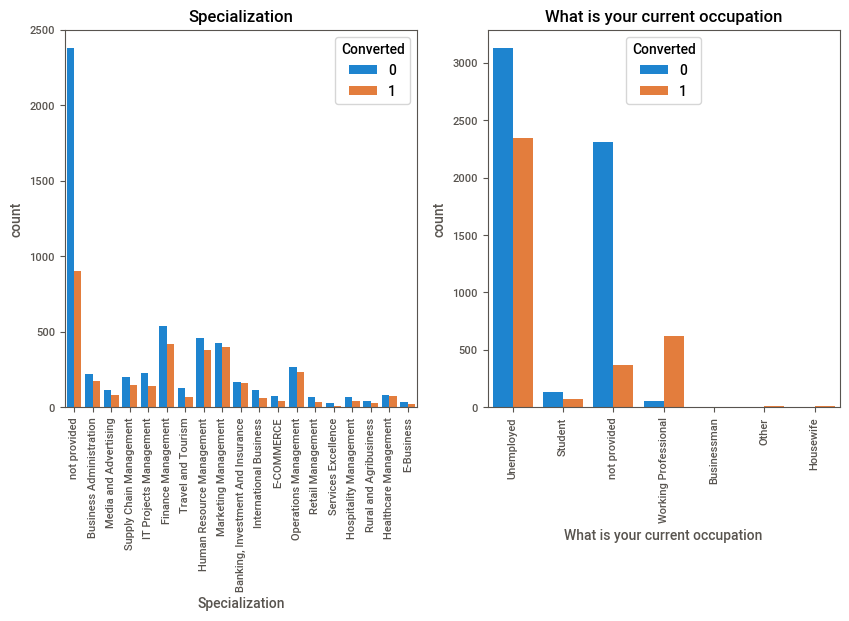

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

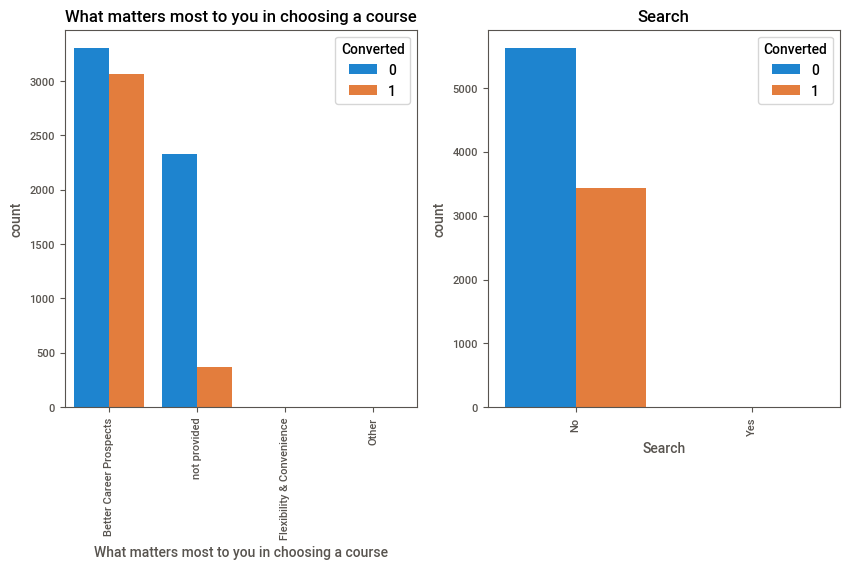

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

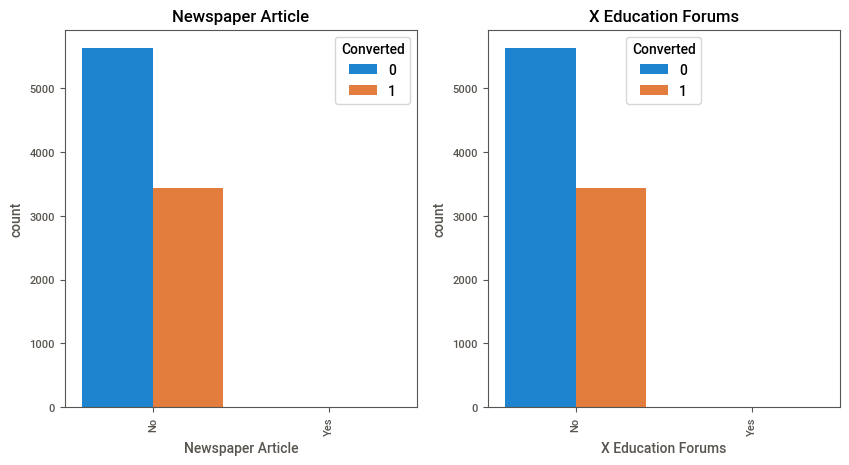

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

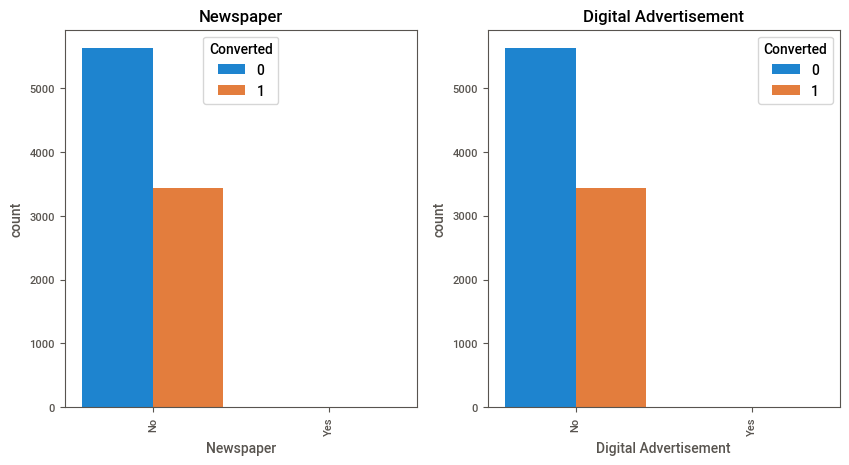

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

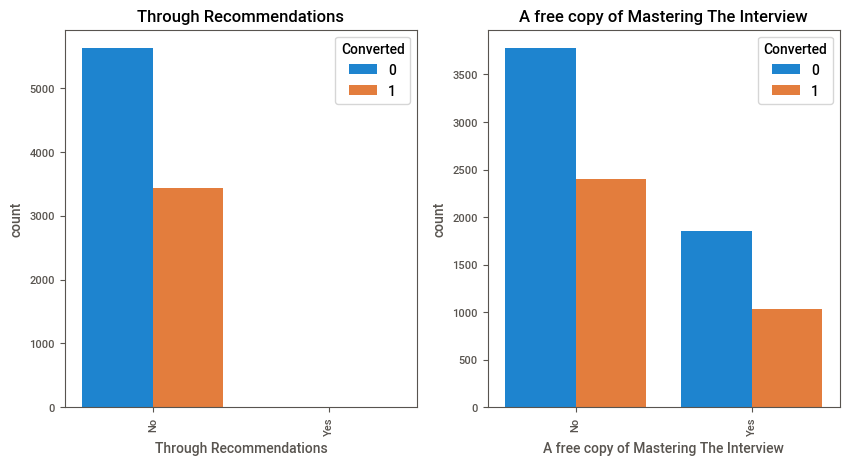

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

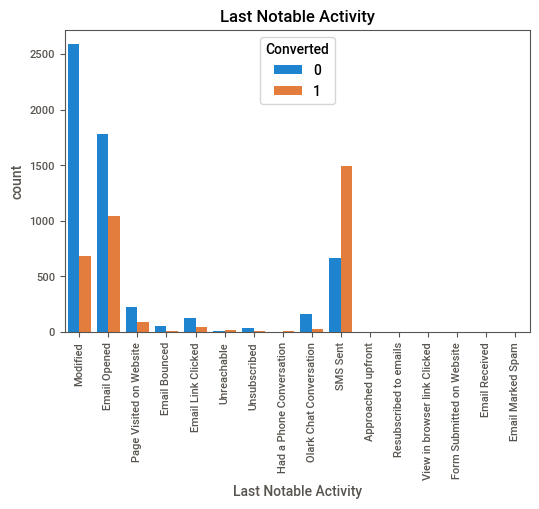

In [50]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

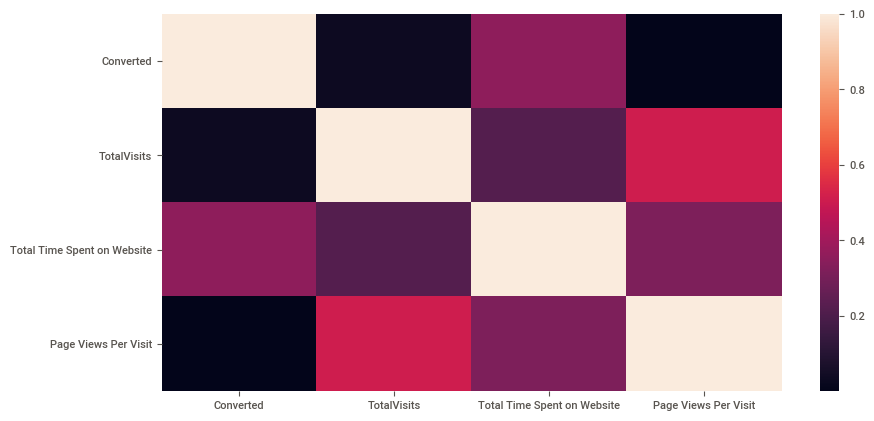

In [51]:
# correlation between variables
plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr())
plt.show()

In [52]:
numeric = lead_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


## Dummy variables

In [53]:
# looking for categorical variables

temp = lead_df.loc[:, lead_df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [54]:
# creating dummy variables using 'get_dummies' command
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country',
       'What is your current occupation','Specialization',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)
# add the result to the main dataframe
lead_df = pd.concat([lead_df,dummy],axis=1)

In [55]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,0,0,1,0,0,0,0,0,0,0


In [56]:
# Dropping the variables for which dummy varialbes have been created and drop 'Specialization_not provided'
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country',
       'What is your current occupation','Specialization','Specialization_not provided',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],1)

In [57]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


## Test - Train Split

In [58]:
# importing required library
from sklearn.model_selection import train_test_split 

In [59]:
# put all the feature variables in x
x = lead_df.drop(['Converted'],1)
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [60]:
# put the target variable in y
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

### Scalling
Since there are few numerical variables with diffrent scale. so we will scale these variables  

In [62]:
# importing MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [63]:
# Scale the three numerical variables 
scaler = MinMaxScaler()
x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
# Correlation between variables
x_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
TotalVisits,1.000000,0.194837,0.467970,0.269443,-0.172404,-0.037380,0.087551,-0.036371,0.100996,-0.011916,...,-0.003571,0.015666,-0.100560,-0.038326,0.235597,-0.008425,-0.006087,0.008460,0.001745,0.010990
Total Time Spent on Website,0.194837,1.000000,0.326378,0.287445,-0.198886,-0.054374,0.148861,-0.053724,0.211340,-0.015772,...,-0.004544,0.024294,-0.125918,-0.045710,0.029070,-0.011152,0.143708,0.001036,0.016790,-0.009103
Page Views Per Visit,0.467970,0.326378,1.000000,0.493007,-0.292378,-0.059971,0.127462,-0.056820,0.217114,-0.020101,...,-0.002255,0.016540,-0.089296,-0.088973,0.027079,-0.014212,0.054423,0.023034,0.020688,0.001751
Lead Origin_Landing Page Submission,0.269443,0.287445,0.493007,1.000000,-0.291790,-0.066193,0.516152,-0.062521,0.080101,-0.019075,...,0.011676,0.004131,-0.072141,-0.117447,0.035681,-0.013487,0.048612,0.005264,0.009496,-0.013487
Lead Origin_Lead Add Form,-0.172404,-0.198886,-0.292378,-0.291790,1.000000,-0.016721,-0.168497,-0.017068,-0.186292,0.065373,...,-0.003407,-0.011813,-0.078809,-0.024172,-0.013768,-0.003407,0.126731,-0.007655,-0.018067,-0.003407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,-0.008425,-0.011152,-0.014212,-0.013487,-0.003407,-0.000773,-0.007788,-0.000789,-0.008611,-0.000223,...,-0.000157,-0.000546,-0.009401,-0.001749,-0.002372,1.000000,-0.007136,-0.000805,-0.000835,-0.000157
Last Notable Activity_SMS Sent,-0.006087,0.143708,0.054423,0.048612,0.126731,-0.029053,0.007721,-0.024046,-0.002990,0.031210,...,-0.007136,-0.024743,-0.426023,-0.079254,-0.107471,-0.007136,1.000000,-0.036461,-0.037843,-0.007136
Last Notable Activity_Unreachable,0.008460,0.001036,0.023034,0.005264,-0.007655,-0.003949,-0.012272,-0.004031,0.019437,-0.001138,...,-0.000805,-0.002790,-0.048031,-0.008935,-0.012117,-0.000805,-0.036461,1.000000,-0.004267,-0.000805
Last Notable Activity_Unsubscribed,0.001745,0.016790,0.020688,0.009496,-0.018067,-0.004098,-0.009473,-0.004183,-0.004906,-0.001181,...,-0.000835,-0.002895,-0.049852,-0.009274,-0.012576,-0.000835,-0.037843,-0.004267,1.000000,-0.000835


## Model Building
Since there are so many variables so the best option is to use RFE to get small set of imortant variables

In [65]:
# importing 'LogisticRegression' and creating a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [66]:
# importin RFE
from sklearn.feature_selection import RFE

In [67]:
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(x_train,y_train)

In [68]:
# variables selected by RFE
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 31),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Source_Direct Traffic', False, 15),
 ('Lead Source_Facebook', False, 40),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Live Chat', False, 54),
 ('Lead Source_NC_EDM', False, 23),
 ('Lead Source_Olark Chat', False, 60),
 ('Lead Source_Organic Search', False, 17),
 ('Lead Source_Pay per Click Ads', False, 50),
 ('Lead Source_Press_Release', False, 71),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 80),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 68),
 ('Lead Source_blog', False, 53),
 ('Lead Source_google', False, 22),
 ('Lead Source_testone', False, 49),
 ('Lead Source_welearnblog_Home', False, 59),

In [69]:
# storing all the variables selected by RFE
col = x_train.columns[rfe.support_]

In [70]:
# selecting columns selected by RFE
x_train = x_train[col]

In [71]:
# importing statsmodels
import statsmodels.api as sm

In [72]:
x_train_sm = sm.add_constant(x_train)
logm1 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.7
Date:                Sat, 13 Nov 2021   Deviance:                       5117.5
Time:                        02:36:36   Pearson chi2:                 6.23e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.8274      0.092     -9.007      0.000      -1.007      -0.647
TotalVisits                                                    8.3157      2.186      3.805      0.000       4.032      12.600
Total Time Spent on Website                                    4.6301      0.169     27.400      0.000       4.299       4.961
Lead Origin_Lead Add Form                                      2.3694      0.229     10.349      0.000       1.921       2.818
Lead Source_Welingak Website                                   2.0527      0.756      2.714      0.007       0.570       3.535
Do Not Email_Yes                                              -1.8958      0.179    -10.607      0.000      -2.246      -1.546
Last Activity_Had a Phone Conversation                         1.8478      0.791      2.336      0.019       0.298       3.398
Last Activity_Olark Chat Conversation                         -1.5602      0.170     -9.201      0.000      -1.893      -1.228
Country_not provided                                           1.5227      0.114     13.305      0.000       1.298       1.747
What is your current occupation_Housewife                     22.6893   1.59e+04      0.001      0.999   -3.12e+04    3.13e+04
What is your current occupation_Working Professional           2.4325      0.189     12.886      0.000       2.063       2.803
What matters most to you in choosing a course_not provided    -1.1800      0.088    -13.342      0.000      -1.353      -1.007
Last Notable Activity_Email Link Clicked                      -1.7056      0.260     -6.554      0.000      -2.216      -1.196
Last Notable Activity_Email Opened                            -1.2656      0.088    -14.360      0.000      -1.438      -1.093
Last Notable Activity_Modified                                -1.6420      0.093    -17.684      0.000      -1.824      -1.460
Last Notable Activity_Page Visited on Website                 -1.6802      0.214     -7.838      0.000      -2.100      -1.260
==============================================================================================================================
"""

In [73]:
# importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# make a VIF dataframe
vif = pd.DataFrame()
vif['features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
7,Country_not provided,2.15
2,Lead Origin_Lead Add Form,1.88
13,Last Notable Activity_Modified,1.80
1,Total Time Spent on Website,1.65
0,TotalVisits,1.59
10,What matters most to you in choosing a course_...,1.57
6,Last Activity_Olark Chat Conversation,1.54
12,Last Notable Activity_Email Opened,1.54
3,Lead Source_Welingak Website,1.33
9,What is your current occupation_Working Profes...,1.19


Though VIF looks good for all the variables but p- values for few variables are more than 0.05. So we will remove one variable with high p-value and see the difference in the output  

In [75]:
# dropping 'What is your current occupation_Housewife' since p-value higher than 0.05
x_train.drop('What is your current occupation_Housewife', axis =1, inplace = True)

In [76]:
# Refit the model with new set of variables
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.2
Date:                Sat, 13 Nov 2021   Deviance:                       5126.4
Time:                        02:36:37   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.8230      0.092     -8.969      0.000      -1.003      -0.643
TotalVisits                                                    8.2358      2.182      3.774      0.000       3.958      12.513
Total Time Spent on Website                                    4.6244      0.169     27.414      0.000       4.294       4.955
Lead Origin_Lead Add Form                                      2.4079      0.229     10.528      0.000       1.960       2.856
Lead Source_Welingak Website                                   2.0170      0.756      2.666      0.008       0.534       3.500
Do Not Email_Yes                                              -1.8967      0.179    -10.609      0.000      -2.247      -1.546
Last Activity_Had a Phone Conversation                         1.8461      0.791      2.335      0.020       0.296       3.396
Last Activity_Olark Chat Conversation                         -1.5571      0.170     -9.183      0.000      -1.889      -1.225
Country_not provided                                           1.5127      0.114     13.247      0.000       1.289       1.736
What is your current occupation_Working Professional           2.4269      0.189     12.856      0.000       2.057       2.797
What matters most to you in choosing a course_not provided    -1.1824      0.088    -13.376      0.000      -1.356      -1.009
Last Notable Activity_Email Link Clicked                      -1.6923      0.259     -6.541      0.000      -2.199      -1.185
Last Notable Activity_Email Opened                            -1.2585      0.088    -14.293      0.000      -1.431      -1.086
Last Notable Activity_Modified                                -1.6403      0.093    -17.670      0.000      -1.822      -1.458
Last Notable Activity_Page Visited on Website                 -1.6779      0.214     -7.830      0.000      -2.098      -1.258
==============================================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
7,Country_not provided,2.15
2,Lead Origin_Lead Add Form,1.87
12,Last Notable Activity_Modified,1.80
1,Total Time Spent on Website,1.65
0,TotalVisits,1.59
9,What matters most to you in choosing a course_...,1.57
6,Last Activity_Olark Chat Conversation,1.54
11,Last Notable Activity_Email Opened,1.54
3,Lead Source_Welingak Website,1.33
8,What is your current occupation_Working Profes...,1.19


Since all the p- values are less than 0.05 and VIF is low we can proceed further.

In [78]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(x_train))
y_train_pred[:10]

3009    0.085210
1012    0.266026
9226    0.278742
4750    0.716480
7987    0.729350
1281    0.794521
2880    0.040809
4971    0.928806
7536    0.899497
1248    0.670877
dtype: float64

In [79]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0852101 , 0.26602645, 0.27874205, 0.71647997, 0.72935035,
       0.79452055, 0.04080877, 0.92880577, 0.89949699, 0.67087743])

In [80]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.085210
1,0,0.266026
2,0,0.278742
3,1,0.716480
4,1,0.729350


In [81]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.085210,0
1,0,0.266026,0
2,0,0.278742,0
3,1,0.716480,1
4,1,0.729350,1


## Model Evaluation

In [82]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [83]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3461  444]
 [ 736 1710]]


In [84]:
# Predicted     not_churn    churn
# Actual
# not_churn        2543      463
# churn            692       1652  

In [85]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8142024877971973


In [86]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
# Calculate the sensitivity

TP/(TP+FN)

0.6991005723630417

In [88]:
# Calculate the specificity

TN/(TN+FP)

0.8862996158770806

## Optimise Cut off (ROC Curve)

In [89]:
# finding otimum cut off 

# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None




In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [91]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

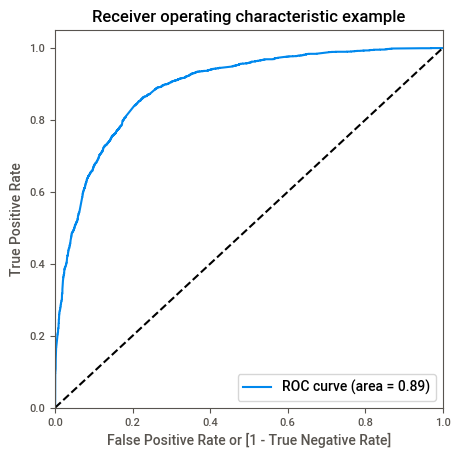

In [92]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.89 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [93]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.085210,0,1,0,0,0,0,0,0,0,0,0
1,0,0.266026,0,1,1,1,0,0,0,0,0,0,0
2,0,0.278742,0,1,1,1,0,0,0,0,0,0,0
3,1,0.716480,1,1,1,1,1,1,1,1,1,0,0
4,1,0.729350,1,1,1,1,1,1,1,1,1,0,0


In [94]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.613289  0.977514  0.385147
0.2   0.2  0.764289  0.917007  0.668630
0.3   0.3  0.806172  0.865495  0.769014
0.4   0.4  0.813258  0.771464  0.839437
0.5   0.5  0.814202  0.699101  0.886300
0.6   0.6  0.809006  0.633688  0.918822
0.7   0.7  0.779562  0.517171  0.943918
0.8   0.8  0.760983  0.432952  0.966453
0.9   0.9  0.711856  0.272281  0.987196


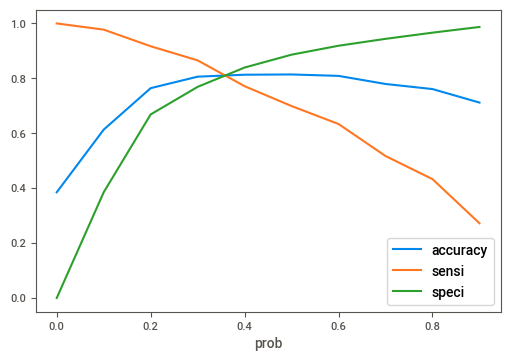

In [95]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.38, you get the optimal values of the three metrics. So let's choose 0.38 as our cutoff now.

In [96]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.085210,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.266026,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.278742,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.716480,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.729350,1,1,1,1,1,1,1,1,1,0,0,1


In [97]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8116831994961423

In [98]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3232,  673],
       [ 523, 1923]], dtype=int64)

In [99]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [100]:
# Calculate Sensitivity

TP/(TP+FN)

0.786181520850368

In [101]:
# Calculate Specificity

TN/(TN+FP)

0.8276568501920615

This cutoff point seems good since the difference has been reduced.

## Prediction on Test set

In [102]:
# Scaling numeric values
x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(x_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [103]:
# Select the columns in X_train for X_test as well
x_test = x_test[col]
x_test.head()


,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Country_not provided,What is your current occupation_Housewife,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
3271,0.015936,0.070530,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0.019920,0.679695,0,0,0,0,0,0,0,1,0,0,1,0,0
7936,0.007968,0.033243,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,0,1,0
3830,0.031873,0.073675,0,0,0,0,0,0,0,0,1,0,1,0,0


In [104]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test[col])
x_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Country_not provided,What is your current occupation_Housewife,What is your current occupation_Working Professional,What matters most to you in choosing a course_not provided,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Page Visited on Website
3271,1.0,0.015936,0.070530,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,1.0,0.019920,0.679695,0,0,0,0,0,0,0,1,0,0,1,0,0
7936,1.0,0.007968,0.033243,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,1.0,0.000000,0.000000,1,0,0,0,0,1,0,0,0,0,0,1,0
3830,1.0,0.031873,0.073675,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.011952,0.372417,0,0,0,0,0,0,0,0,1,0,0,1,0
2879,1.0,0.007968,0.264600,0,0,0,0,0,0,0,0,0,0,0,1,0
6501,1.0,0.031873,0.599730,0,0,0,0,0,0,0,0,0,0,0,0,0
7155,1.0,0.011952,0.231357,0,0,0,0,0,0,0,0,1,0,0,1,0


In [105]:
# Drop the required column from X_test as well
x_test.drop(['What is your current occupation_Housewife'], 1, inplace = True)

In [106]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(x_test))

In [107]:
y_test_pred[:10]

3271    0.056972
1490    0.974731
7936    0.045452
4216    0.811098
3830    0.065330
1800    0.668212
6507    0.387787
4821    0.354540
4223    0.956789
4714    0.105923
dtype: float64

In [108]:
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Check 'y_pred_final'
y_pred_final.head()


,Converted,0
0,0,0.056972
1,1,0.974731
2,0,0.045452
3,1,0.811098
4,0,0.065330


In [109]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.056972
1,1,0.974731
2,0,0.045452
3,1,0.811098
4,0,0.065330


In [110]:
# Make predictions on the test set using 0.38 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.056972,0
1,1,0.974731,1
2,0,0.045452,0
3,1,0.811098,1
4,0,0.065330,0


In [111]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8108703635695924

In [112]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1440,  294],
       [ 221,  768]], dtype=int64)

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Calculate sensitivity
TP / float(TP+FN)

0.7765419615773509

In [115]:
# Calculate specificity
TN / float(TN+FP)

0.8304498269896193

## Precision-Recall

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3461,  444],
       [ 736, 1710]], dtype=int64)

In [117]:
# Precision
# TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7938718662952646

In [118]:
# Recall
# TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6991005723630417

## Precision and Recall tradeoff

In [119]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

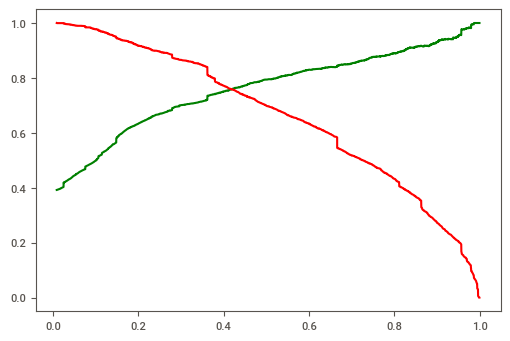

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [122]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.085210,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.266026,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.278742,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.716480,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.729350,1,1,1,1,1,1,1,1,1,0,0,1


In [123]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8140450322783813

In [124]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3317,  588],
       [ 593, 1853]], dtype=int64)

In [125]:
# Calculate Precision

TP/(TP+FP)

0.7231638418079096

In [126]:
# Calculate Recall

TP/(TP+FN)

0.7765419615773509

The difference between two has gone down so this seems good cutoff point

## Prediction on Test set

In [127]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(x_test))

In [128]:
y_test_pred[:10]

3271    0.056972
1490    0.974731
7936    0.045452
4216    0.811098
3830    0.065330
1800    0.668212
6507    0.387787
4821    0.354540
4223    0.956789
4714    0.105923
dtype: float64

In [129]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head

y_pred_1.head()

,0
3271,0.056972
1490,0.974731
7936,0.045452
4216,0.811098
3830,0.065330


In [130]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.056972
1,1,0.974731
2,0,0.045452
3,1,0.811098
4,0,0.065330


In [131]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.056972
1,1,0.974731
2,0,0.045452
3,1,0.811098
4,0,0.065330


In [132]:
# Make predictions on the test set using 0.42 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.056972,0
1,1,0.974731,1
2,0,0.045452,0
3,1,0.811098,1
4,0,0.065330,0


In [133]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8145427836944547

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1477,  257],
       [ 248,  741]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Calculate Precision

TP/(TP+FP)

0.7424849699398798

In [137]:
# Calculate Recall

TP/(TP+FN)

0.7492416582406471


## Conclusion

It can be seen in our final model that there are lot of features which will impact the potential buyers decision to enroll in the course we will see few variables which have positive effect on our target variable in descending order:

1. TotalVisits (Total number of visits made by the customer on the website.)
2. The total time spent on the Website.
3. When their current occupation_working professional
4. Lead origin_Lead Add Form
5. Lead source_wellingak website
6. Lead activity_had a phone conversation

Keeping these in mind the X Education can look into their leads and focus more time on clients with these features in the data to increase their conversion rate.